## 771767_B22_T3A: Applied Artificial Intelligence (Project)
### Student Name: Omeimen Ohiomoba
### Student Number: 202208553

In [4]:
#!pip install opencv-python
#!pip install --upgrade tensorflow 
#!pip install --upgrade scikit-learn
#!pip install seaborn
#!pip install imblearn

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from os import makedirs
from os.path import isfile, join
import shutil  # for moving or copying files from one path to another
import random
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

import matplotlib.image as mat_img
import matplotlib.pyplot as plt

import seaborn as sns
import random

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #Helps to load image
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from keras.models import load_model

from sklearn.svm import SVC

In [2]:
# Function for creating new directory:
def create_new_directory(train_path, test_path, label_name):
    """
    Create both training and testing directories with corresponding sub-folders.
    train_path: Path to training folder
    test_path: Path to testing folder
    label_name: sub-folder title
    """
    if not os.path.exists(train_path):
        os.makedirs(train_path)  # create train directory
    if not os.path.exists(test_path):
        os.makedirs(test_path)   # create test directory
    if not os.path.exists(join(train_path, label_name)):
        os.makedirs(join(train_path, label_name))
    if not os.path.exists(join(test_path, label_name)):
        os.makedirs(join(test_path, label_name))

In [3]:
# Function for spliting into training and testing:
def image_selection(file_path, label_name, test_percent):
    """
    For copying and seperating images into both training and testing.
    file_path: Path to the root file i.e where the label_name is located.
    label_name: Sub-folder containing images.
    file_type: Image format (.jpeg, .jpg, .png, etc.)
    """
    # label directory:
    label_path = join(file_path, label_name)


    #sanity check (good to ensure the images are in the same format)
    image_contents = [join(label_path,files) for files in os.listdir(label_path)\
                    if isfile(join(label_path, files))]

    # shuffling the images (ensure random image selection)
    random.shuffle(image_contents, random=None)

    # computing the number of images to use for training and testing
    test_percentage = test_percent
    test_image_num = int(test_percentage * len(image_contents))
    train_image_num = len(image_contents) - test_image_num

    # Create paths for training and testing
    train_directory = join(file_path, 'train')
    test_directory = join(file_path, 'test')

    # Create training and testing directories using the paths
    create_new_directory(train_directory, test_directory, label_name)

    # copying the images to the training and testing directories
    for index,images in enumerate(image_contents):
        if index in range(train_image_num):
            shutil.copy(images, join(train_directory, label_name))
        else:
            shutil.copy(images, join(test_directory, label_name))

In [4]:
# Function for Model performance:
def model_performance(figsize,model_name,history1,label1,history2,label2,title,xlabel,ylabel,epoch):
    plt.figure(figsize=(figsize))
    plt.plot(model_name.history[history1], label=label1)
    plt.plot(model_name.history[history2], label=label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(0,epoch,2),range(1,(epoch+1),2))
    plt.grid(linestyle='--',linewidth=0.4)
    plt.legend()
    plt.show()
    return

In [5]:
# Function to check image shape:
def check_shape(label_list, file_path):
    for label in label_list:
        image_list = []
        print(label)
        path_to_class = join(file_path, label)
        class_list = os.listdir(path_to_class)[:5]
        for image in class_list:
            img = cv2.imread(join(path_to_class, image))
            image_list.append(img)
        for images in image_list:
            print(images.shape)
        print('=' * 15)

In [6]:
# Path to image file folder:
input_dir = 'Brain Tumor Data Set'

In [7]:
os.listdir(input_dir)

['Brain Tumor', 'Healthy']

In [8]:
check_shape(label_list=os.listdir(input_dir), file_path=input_dir)

Brain Tumor
(512, 512, 3)
(300, 240, 3)
(256, 256, 3)
(512, 512, 3)
(256, 256, 3)
Healthy
(630, 630, 3)
(350, 350, 3)
(1080, 1920, 3)
(630, 630, 3)
(290, 236, 3)


- Images are of varying sizes and needs to be resized.

In [8]:
# Resizing images:
resized_path = 'Resized_Brain_data'
if not os.path.exists(resized_path):
    os.makedirs(resized_path)
    for folder in os.listdir(input_dir):
        if not os.path.exists(join(resized_path, folder)):
            os.makedirs(join(resized_path, folder))
            for image in os.listdir(join(input_dir, folder)):
                image_file = cv2.imread(join(join(input_dir, folder), image))
                image_resize = cv2.resize(image_file, (200,200))
                cv2.imwrite(join(join(resized_path, folder), image.split('.')[0] + '.png' ), image_resize)
            image_selection(file_path=resized_path, label_name=folder, test_percent=0.2)
        else:
            print(f'{folder} folder already exists.')
else:
    print('Path already exists.')

In [9]:
# Creating path to resized images:
res_dir = 'Resized_Brain_data'
train_res_dir = 'Resized_Brain_data/train'
test_res_dir = 'Resized_Brain_data/test'


train_res_label = os.listdir(train_res_dir)
test_res_label = os.listdir(test_res_dir)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Resized_Brain_data/train'

In [10]:
# Checking image shape:
check_shape(label_list=train_res_label, file_path=train_res_dir)

Brain Tumor
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
Healthy
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


- Images now resized to a uniform shape.

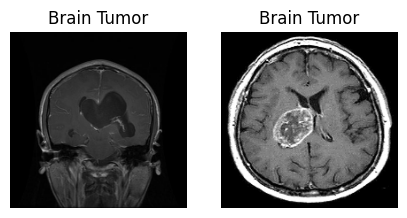

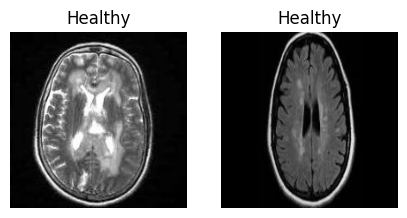

In [11]:
# Viewing first two images for both classes:
for image_dir in os.listdir('Resized_Brain_data/train'):
    path = join('Resized_Brain_data/train',image_dir)
    image_list = os.listdir(path)
    plt.figure(figsize=(5,15))
    for img, i in zip(image_list[:2], range(9)):
        image = mat_img.imread(join(path, img))
        plt.subplot(4,2,i+1)
        plt.imshow(image)
        plt.title(image_dir)
        plt.axis('off')
    plt.show()

In [14]:
os.listdir(res_dir)[2:]

['test', 'train']

In [15]:
for label in os.listdir(res_dir)[2:]:
    
    print(label)
    path_to_class = join(res_dir, label)
    for status in os.listdir(path_to_class):
        image_list = []
        new_path = join(path_to_class, status)
        class_list = os.listdir(new_path)[:5]
        for image in class_list:
            img = cv2.imread(join(new_path, image))
            image_list.append(img)
        for images in image_list:
            print(f'min pixel:{np.min(images)}, max pixel: {np.max(images)}')
    print('=' * 15)

test
min pixel:0, max pixel: 240
min pixel:0, max pixel: 244
min pixel:0, max pixel: 255
min pixel:0, max pixel: 209
min pixel:0, max pixel: 254
min pixel:0, max pixel: 244
min pixel:0, max pixel: 255
min pixel:0, max pixel: 254
min pixel:0, max pixel: 244
min pixel:5, max pixel: 255
train
min pixel:0, max pixel: 224
min pixel:0, max pixel: 255
min pixel:20, max pixel: 254
min pixel:0, max pixel: 238
min pixel:2, max pixel: 255
min pixel:0, max pixel: 255
min pixel:0, max pixel: 241
min pixel:0, max pixel: 255
min pixel:0, max pixel: 255
min pixel:0, max pixel: 251


- Image pixel are between 0 to 255. Need rescaling.

In [7]:
# Image Scaling with data generator:
train_datagen = ImageDataGenerator(rescale = 1.0/255)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [8]:
# Obtaining training and test data:
train_generator = train_datagen.flow_from_directory(train_res_dir, target_size = (200,200),
                                                    batch_size = 32, class_mode = 'binary', shuffle = False)

test_generator = train_datagen.flow_from_directory(test_res_dir, target_size = (200,200),
                                                    batch_size = 32, class_mode = 'binary', shuffle = False)

NameError: name 'train_res_dir' is not defined

### Functions for CNN Architecture

In [14]:
def model_performance(figsize,model_name,history1,label1,history2,label2,title,xlabel,ylabel,epoch):
    plt.figure(figsize=(figsize))
    plt.plot(model_name.history[history1], label=label1)
    plt.plot(model_name.history[history2], label=label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(0,epoch,2),range(1,(epoch+1),2))
    plt.grid(linestyle='--',linewidth=0.4)
    plt.legend()
    plt.show()
    return

In [15]:
def building_model(model,test_data):
    #model.fit(Xtrain_data,Ytrain_data)
    y_pred_ = model.predict(test_data)
    y_pred = np.argmax(y_pred_, axis=1)
    return y_pred


def classification_confusion_matrix(fig,yTest,yTrain,yPrediction_train, yPrediction_test,display_labels):
    print('Classification Report for Training:')
    print(classification_report(yTrain, yPrediction_train))
    print('='*80)
    print('Classification Report for Testing:')
    print(classification_report(yTest, yPrediction_test))
    print('='*80)
    fig, ax = plt.subplots(1,2,figsize=fig)
    ConfusionMatrixDisplay.from_predictions(yTrain,yPrediction_train, display_labels=display_labels,ax=ax[0])
    ConfusionMatrixDisplay.from_predictions(yTest,yPrediction_test, display_labels=display_labels,ax=ax[1])
    ax[0].title.set_text('Training')
    ax[1].title.set_text('Testing')
    plt.show()
    return

### Simple CNN Architecture (No tuning):

In [20]:
# Define Model Architecture
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (200,200,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [22]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Define model checkpoint and early stopping
os.makedirs(join('Resized_Brain_data', 'Models'))
model_path = 'Resized_Brain_data/Models'   # Creating path to save models
checkpoint = ModelCheckpoint(os.path.join(model_path, 'model1.hdf5'),save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=3)

In [24]:
# train the network
batch_size = 32
history = model.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size,
                    validation_data = test_generator, validation_steps = test_generator.samples//batch_size,
                    epochs = 15, callbacks = [checkpoint, early_stop])

Epoch 1/15
112/112 [==============================] - ETA: 0s - loss: 1.5360 - accuracy: 0.4691
Epoch 1: val_loss improved from inf to 0.69310, saving model to Resized_Brain_data/Models\model1.hdf5
112/112 [==============================] - 149s 1s/step - loss: 1.5360 - accuracy: 0.4691 - val_loss: 0.6931 - val_accuracy: 0.5413
Epoch 2/15
112/112 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5169
Epoch 2: val_loss improved from 0.69310 to 0.68912, saving model to Resized_Brain_data/Models\model1.hdf5
112/112 [==============================] - 65s 572ms/step - loss: 0.6929 - accuracy: 0.5169 - val_loss: 0.6891 - val_accuracy: 0.6406
Epoch 3/15
112/112 [==============================] - ETA: 0s - loss: 0.6713 - accuracy: 0.6045
Epoch 3: val_loss improved from 0.68912 to 0.64644, saving model to Resized_Brain_data/Models\model1.hdf5
112/112 [==============================] - 71s 632ms/step - loss: 0.6713 - accuracy: 0.6045 - val_loss: 0.6464 - val_accuracy: 0.657

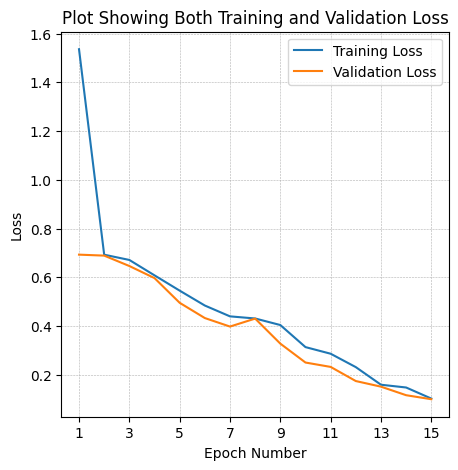

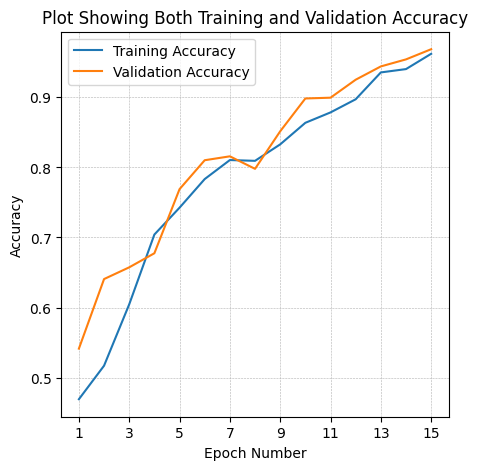

In [26]:
#Plotting Training and Validation loss:
model_performance(figsize=(5,5),model_name=history,history1='loss',label1='Training Loss',history2='val_loss',
                  label2='Validation Loss',title='Plot Showing Both Training and Validation Loss',
                  xlabel='Epoch Number',ylabel='Loss',epoch=15)

#Plotting Training and Validation Accuracies:
model_performance(figsize=(5,5),model_name=history,history1='accuracy',label1='Training Accuracy',
                  history2='val_accuracy',label2='Validation Accuracy',
                  title='Plot Showing Both Training and Validation Accuracy',xlabel='Epoch Number',
                  ylabel='Accuracy',epoch=15)

In [40]:
# Defining class label names:
class_list = []
for class_ in list(train_generator.class_indices.keys()):
    if class_ == 'Brain Tumor':
        class_list.append('Tumor')
    else:
        class_list.append('No Tumor')
class_list

['Tumor', 'No Tumor']

29/29 [==============================] - 21s 736ms/step
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1941
           1       0.99      0.97      0.98      1664

    accuracy                           0.98      3605
   macro avg       0.98      0.98      0.98      3605
weighted avg       0.98      0.98      0.98      3605

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       485
           1       0.97      0.96      0.97       416

    accuracy                           0.97       901
   macro avg       0.97      0.97      0.97       901
weighted avg       0.97      0.97      0.97       901



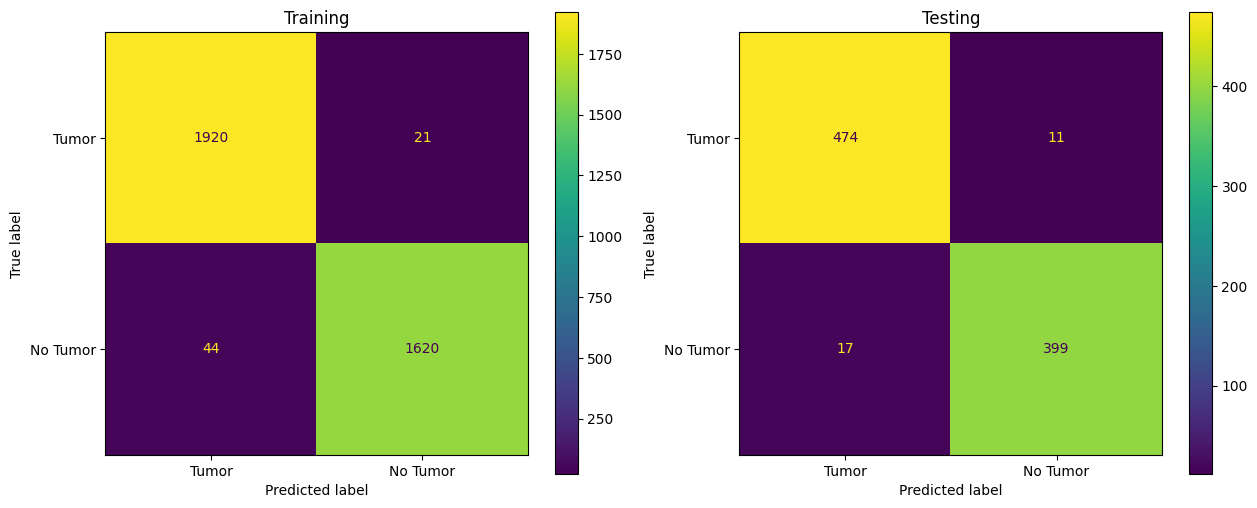

In [37]:
# Model performance Evaluation:
model1 = load_model('Resized_Brain_data/Models/model1.hdf5')

#Training Prediction:
prediction_train = building_model(model=model1,test_data=train_generator)

#Testing Prediction:
prediction_test = building_model(model=model1,test_data=test_generator)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=test_generator.classes,yTrain=train_generator.classes,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,display_labels=class_list)

## Hyperparameter Tuning

### Increasing Number of Epochs to 50:

In [40]:
# Define Model Architecture
model_1 = Sequential()
model_1.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (200,200,3)))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Conv2D(64, (3,3), activation = 'relu'))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Conv2D(64, (3,3), activation = 'relu'))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Conv2D(128, (3,3), activation = 'relu'))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Flatten())
model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dense(2, activation = 'softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)      

In [41]:
# compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
# train the network
epochs = 50
checkpoint2 = ModelCheckpoint(os.path.join(model_path, 'model2.hdf5'),save_best_only=True, verbose=1)
batch_size = 32
history2 = model_1.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size,
                    validation_data = test_generator, validation_steps = test_generator.samples//batch_size,
                    epochs = epochs, callbacks = [checkpoint2, early_stop])

Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 0.7859 - accuracy: 0.5558
Epoch 1: val_loss improved from inf to 0.67300, saving model to Resized_Brain_data/Models\model2.hdf5
112/112 [==============================] - 81s 722ms/step - loss: 0.7859 - accuracy: 0.5558 - val_loss: 0.6730 - val_accuracy: 0.6384
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 0.6612 - accuracy: 0.6090
Epoch 2: val_loss improved from 0.67300 to 0.60325, saving model to Resized_Brain_data/Models\model2.hdf5
112/112 [==============================] - 76s 676ms/step - loss: 0.6612 - accuracy: 0.6090 - val_loss: 0.6032 - val_accuracy: 0.6518
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.6047 - accuracy: 0.6653
Epoch 3: val_loss improved from 0.60325 to 0.51407, saving model to Resized_Brain_data/Models\model2.hdf5
112/112 [==============================] - 67s 594ms/step - loss: 0.6047 - accuracy: 0.6653 - val_loss: 0.5141 - val_accuracy: 0.7

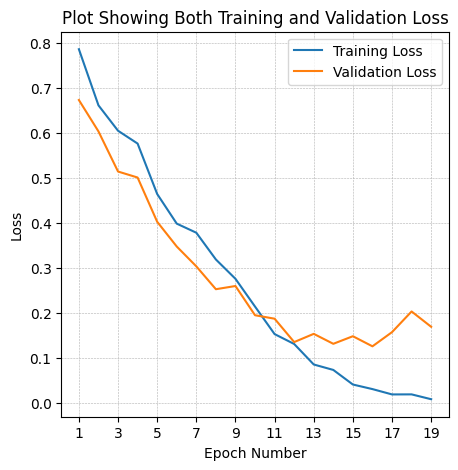

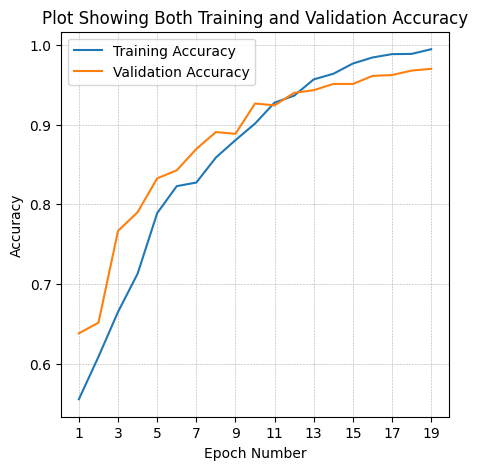

In [45]:
#Plotting Training and Validation loss:
model_performance(figsize=(5,5),model_name=history2,history1='loss',label1='Training Loss',history2='val_loss',
                  label2='Validation Loss',title='Plot Showing Both Training and Validation Loss',
                  xlabel='Epoch Number',ylabel='Loss',epoch=20)

#Plotting Training and Validation Accuracies:
model_performance(figsize=(5,5),model_name=history2,history1='accuracy',label1='Training Accuracy',
                  history2='val_accuracy',label2='Validation Accuracy',
                  title='Plot Showing Both Training and Validation Accuracy',xlabel='Epoch Number',
                  ylabel='Accuracy',epoch=20)

29/29 [==============================] - 14s 511ms/step
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1941
           1       1.00      0.97      0.99      1664

    accuracy                           0.99      3605
   macro avg       0.99      0.99      0.99      3605
weighted avg       0.99      0.99      0.99      3605

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       485
           1       0.97      0.94      0.96       416

    accuracy                           0.96       901
   macro avg       0.96      0.96      0.96       901
weighted avg       0.96      0.96      0.96       901



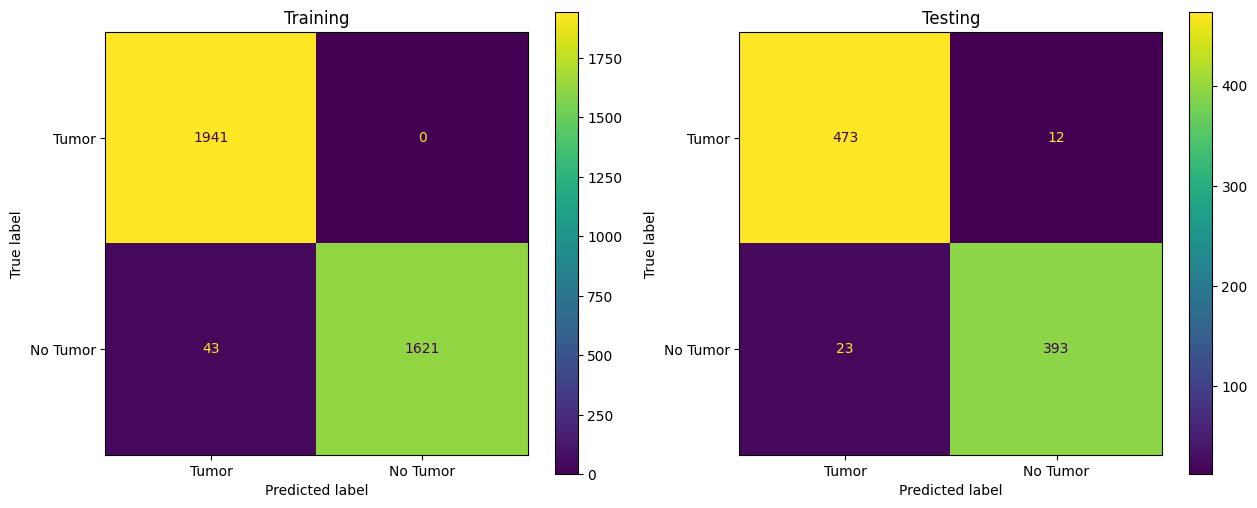

In [44]:
model2 = load_model('Resized_Brain_data/Models/model2.hdf5')

#Training Prediction:
prediction_train2 = building_model(model=model2,test_data=train_generator)

#Testing Prediction:
prediction_test2 = building_model(model=model2,test_data=test_generator)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=test_generator.classes,yTrain=train_generator.classes,yPrediction_train=prediction_train2,
                                yPrediction_test=prediction_test2,display_labels=class_list)

### Data Augmentation & Drop Out (0.5):

In [22]:
# Define the parameter for data augmentation
train_datagen1 = ImageDataGenerator(rescale = 1.0/255, horizontal_flip=True, vertical_flip=True, shear_range=0.2,
                                   zoom_range=0.2)

test_datagen1 = ImageDataGenerator(rescale = 1.0/255)

In [23]:
batch_size = 32
train_generator1 = train_datagen1.flow_from_directory(train_res_dir, target_size = (200,200),
                                                    batch_size = batch_size, class_mode = 'binary', shuffle = False)

test_generator1 = train_datagen1.flow_from_directory(test_res_dir, target_size = (200,200),
                                                    batch_size = batch_size, class_mode = 'binary', shuffle = False)

Found 3605 images belonging to 2 classes.
Found 901 images belonging to 2 classes.


In [48]:
# Define Model Architecture
model3 = Sequential()
model3.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (200,200,3)))
model3.add(MaxPooling2D((2,2)))

model3.add(Conv2D(64, (3,3), activation = 'relu'))
model3.add(MaxPooling2D((2,2)))

model3.add(Conv2D(64, (3,3), activation = 'relu'))
model3.add(MaxPooling2D((2,2)))

model3.add(Conv2D(128, (3,3), activation = 'relu'))
model3.add(MaxPooling2D((2,2)))

model3.add(Flatten())
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(2, activation = 'softmax'))

In [49]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)      

In [50]:
test_generator1.image_shape

(200, 200, 3)

In [53]:
# compile the model
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint3 = ModelCheckpoint(os.path.join(model_path, 'model3.hdf5'),save_best_only=True, verbose=1)

# train the network
batch_size = 32
history3 = model3.fit(train_generator1, steps_per_epoch=train_generator1.samples//batch_size,
                    validation_data = test_generator1, validation_steps = test_generator1.samples//batch_size,
                    epochs = 50, callbacks = [checkpoint3, early_stop])

Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 1.0471 - accuracy: 0.4965
Epoch 1: val_loss improved from inf to 0.69193, saving model to Resized_Brain_data/Models\model3.hdf5
112/112 [==============================] - 123s 1s/step - loss: 1.0471 - accuracy: 0.4965 - val_loss: 0.6919 - val_accuracy: 0.5413
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 0.6958 - accuracy: 0.5505
Epoch 2: val_loss improved from 0.69193 to 0.68526, saving model to Resized_Brain_data/Models\model3.hdf5
112/112 [==============================] - 124s 1s/step - loss: 0.6958 - accuracy: 0.5505 - val_loss: 0.6853 - val_accuracy: 0.5413
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.5612
Epoch 3: val_loss improved from 0.68526 to 0.66281, saving model to Resized_Brain_data/Models\model3.hdf5
112/112 [==============================] - 95s 851ms/step - loss: 0.6878 - accuracy: 0.5612 - val_loss: 0.6628 - val_accuracy: 0.6183


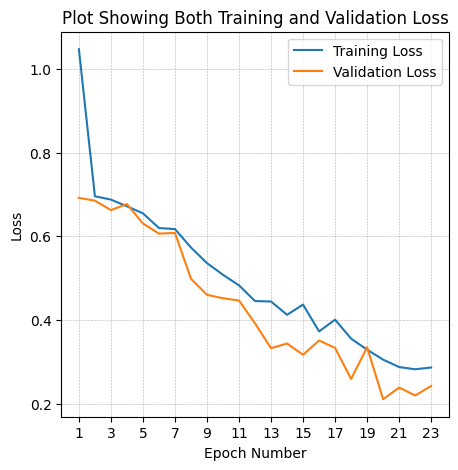

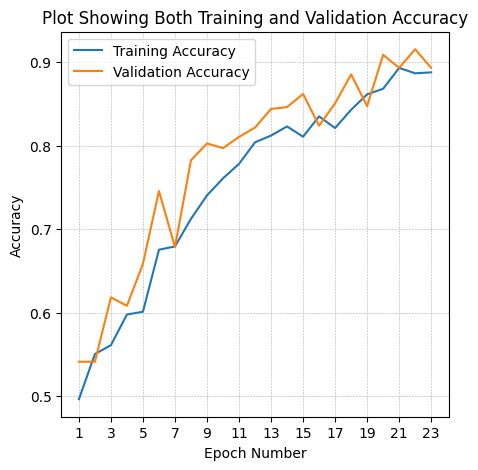

In [56]:
#Plotting Training and Validation loss:
model_performance(figsize=(5,5),model_name=history3,history1='loss',label1='Training Loss',history2='val_loss',
                  label2='Validation Loss',title='Plot Showing Both Training and Validation Loss',
                  xlabel='Epoch Number',ylabel='Loss',epoch=24)

#Plotting Training and Validation Accuracies:
model_performance(figsize=(5,5),model_name=history3,history1='accuracy',label1='Training Accuracy',
                  history2='val_accuracy',label2='Validation Accuracy',
                  title='Plot Showing Both Training and Validation Accuracy',xlabel='Epoch Number',
                  ylabel='Accuracy',epoch=24)

29/29 [==============================] - 16s 574ms/step
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1941
           1       0.93      0.87      0.90      1664

    accuracy                           0.91      3605
   macro avg       0.91      0.91      0.91      3605
weighted avg       0.91      0.91      0.91      3605

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       485
           1       0.93      0.87      0.90       416

    accuracy                           0.91       901
   macro avg       0.91      0.90      0.91       901
weighted avg       0.91      0.91      0.91       901



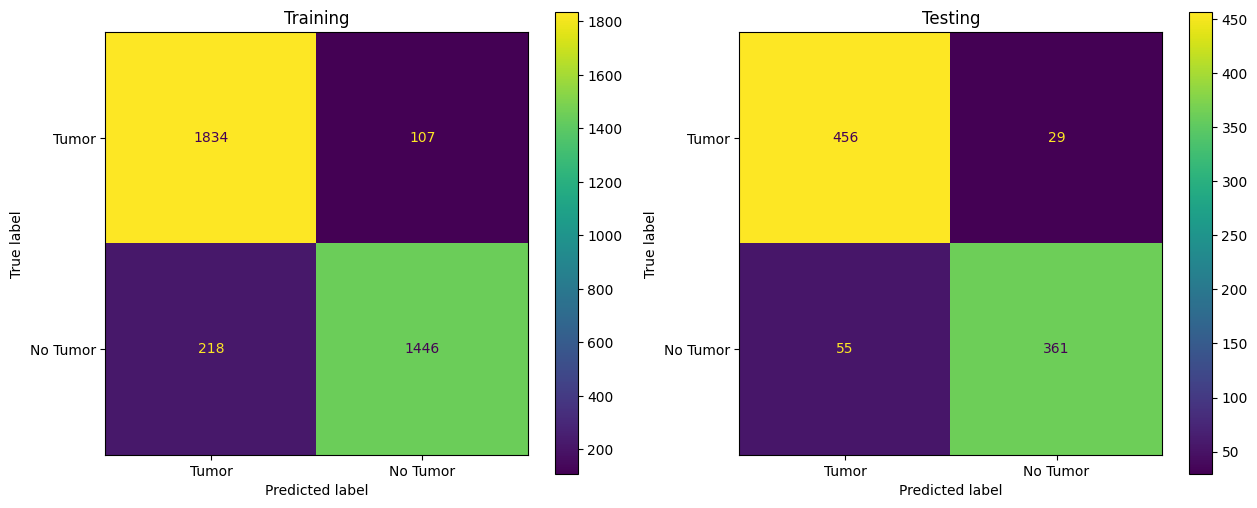

In [55]:
model3 = load_model('Resized_Brain_data/Models/model3.hdf5')

#Training Prediction:
prediction_train3 = building_model(model=model3,test_data=train_generator1)

#Testing Prediction:
prediction_test3 = building_model(model=model3,test_data=test_generator1)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=test_generator1.classes,yTrain=train_generator1.classes,yPrediction_train=prediction_train3,
                                yPrediction_test=prediction_test3,display_labels=class_list)

### Adding Padding to each input layer:

In [61]:
# Define Model Architecture
model4 = Sequential()
model4.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (200,200,3), padding='same'))
model4.add(MaxPooling2D((2,2)))

model4.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
model4.add(MaxPooling2D((2,2)))

model4.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
model4.add(MaxPooling2D((2,2)))

model4.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
model4.add(MaxPooling2D((2,2)))

model4.add(Flatten())
model4.add(Dense(128, activation = 'relu'))
model4.add(Dropout(0.5))
model4.add(Dense(2, activation = 'softmax'))

In [62]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 25, 25, 64)      

In [63]:
# compile the model
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint4 = ModelCheckpoint(os.path.join(model_path, 'model4.hdf5'),save_best_only=True, verbose=1)

# train the network
batch_size = 32
history4 = model4.fit(train_generator1, steps_per_epoch=train_generator1.samples//batch_size,
                    validation_data = test_generator1, validation_steps = test_generator1.samples//batch_size,
                    epochs = epochs, callbacks = [checkpoint4, early_stop])

Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 0.8649 - accuracy: 0.5091
Epoch 1: val_loss improved from inf to 0.67448, saving model to Resized_Brain_data/Models\model4.hdf5
112/112 [==============================] - 88s 776ms/step - loss: 0.8649 - accuracy: 0.5091 - val_loss: 0.6745 - val_accuracy: 0.5915
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.5900
Epoch 2: val_loss improved from 0.67448 to 0.66621, saving model to Resized_Brain_data/Models\model4.hdf5
112/112 [==============================] - 99s 880ms/step - loss: 0.6782 - accuracy: 0.5900 - val_loss: 0.6662 - val_accuracy: 0.6172
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.6194
Epoch 3: val_loss improved from 0.66621 to 0.64893, saving model to Resized_Brain_data/Models\model4.hdf5
112/112 [==============================] - 98s 871ms/step - loss: 0.6617 - accuracy: 0.6194 - val_loss: 0.6489 - val_accuracy: 0.6

112/112 [==============================] - 103s 922ms/step - loss: 0.2368 - accuracy: 0.8950 - val_loss: 0.1708 - val_accuracy: 0.9319
Epoch 27/50
112/112 [==============================] - ETA: 0s - loss: 0.2057 - accuracy: 0.9230
Epoch 27: val_loss did not improve from 0.17079
112/112 [==============================] - 98s 869ms/step - loss: 0.2057 - accuracy: 0.9230 - val_loss: 0.2222 - val_accuracy: 0.9230
Epoch 28/50
112/112 [==============================] - ETA: 0s - loss: 0.2080 - accuracy: 0.9222
Epoch 28: val_loss improved from 0.17079 to 0.16842, saving model to Resized_Brain_data/Models\model4.hdf5
112/112 [==============================] - 90s 805ms/step - loss: 0.2080 - accuracy: 0.9222 - val_loss: 0.1684 - val_accuracy: 0.9375
Epoch 29/50
112/112 [==============================] - ETA: 0s - loss: 0.1901 - accuracy: 0.9306
Epoch 29: val_loss did not improve from 0.16842
112/112 [==============================] - 84s 752ms/step - loss: 0.1901 - accuracy: 0.9306 - val_loss:

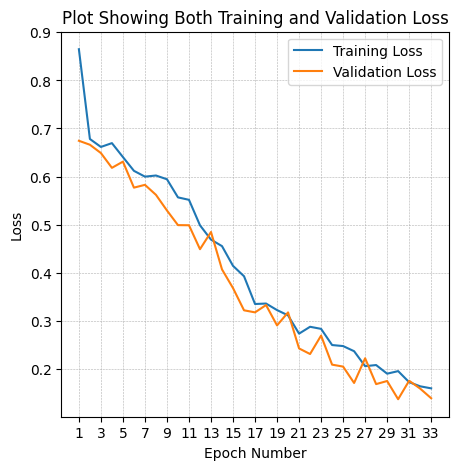

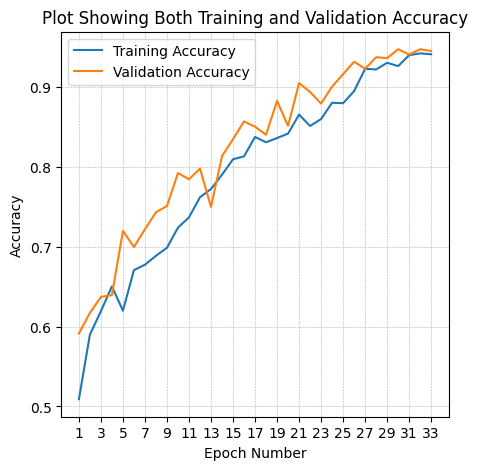

In [64]:
#Plotting Training and Validation loss:
model_performance(figsize=(5,5),model_name=history4,history1='loss',label1='Training Loss',history2='val_loss',
                  label2='Validation Loss',title='Plot Showing Both Training and Validation Loss',
                  xlabel='Epoch Number',ylabel='Loss',epoch=33)

#Plotting Training and Validation Accuracies:
model_performance(figsize=(5,5),model_name=history4,history1='accuracy',label1='Training Accuracy',
                  history2='val_accuracy',label2='Validation Accuracy',
                  title='Plot Showing Both Training and Validation Accuracy',xlabel='Epoch Number',
                  ylabel='Accuracy',epoch=33)

29/29 [==============================] - 19s 678ms/step
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1941
           1       0.96      0.93      0.95      1664

    accuracy                           0.95      3605
   macro avg       0.95      0.95      0.95      3605
weighted avg       0.95      0.95      0.95      3605

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       485
           1       0.98      0.93      0.95       416

    accuracy                           0.96       901
   macro avg       0.96      0.96      0.96       901
weighted avg       0.96      0.96      0.96       901



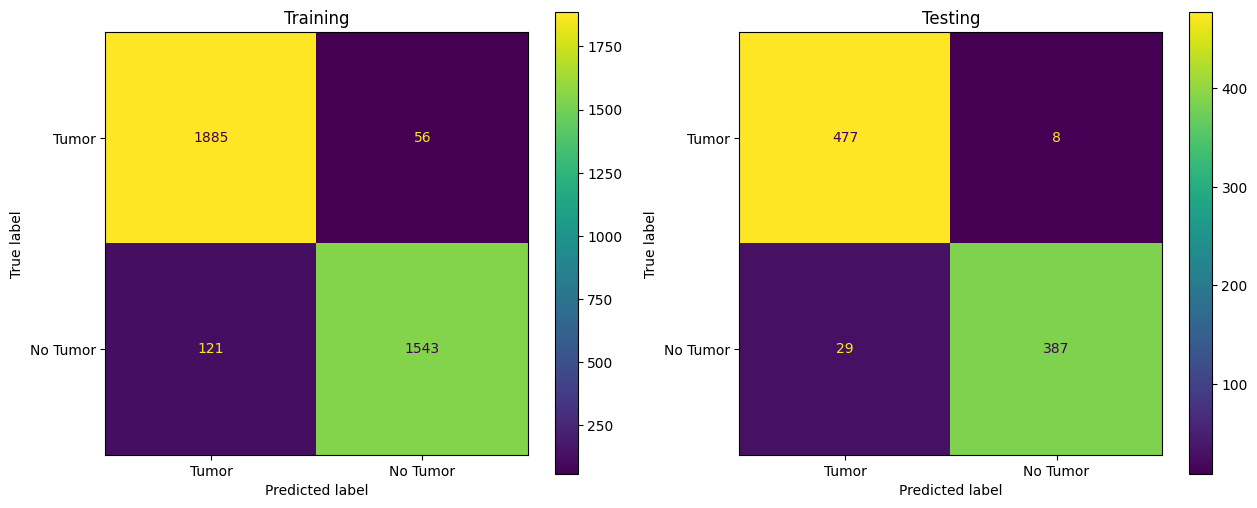

In [65]:
model4 = load_model('Resized_Brain_data/Models/model4.hdf5')

#Training Prediction:
prediction_train4 = building_model(model=model4,test_data=train_generator1)

#Testing Prediction:
prediction_test4 = building_model(model=model4,test_data=test_generator1)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=test_generator1.classes,yTrain=train_generator1.classes,yPrediction_train=prediction_train4,
                                yPrediction_test=prediction_test4,display_labels=class_list)

### Adjusting learning rate:

Learning rate = 0.0001

In [66]:
# Define Model Architecture
model5 = Sequential()
model5.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (200,200,3), padding='same'))
model5.add(MaxPooling2D((2,2)))

model5.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
model5.add(MaxPooling2D((2,2)))

model5.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
model5.add(MaxPooling2D((2,2)))

model5.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
model5.add(MaxPooling2D((2,2)))

model5.add(Flatten())
model5.add(Dense(128, activation = 'relu'))
model5.add(Dropout(0.5))
model5.add(Dense(2, activation = 'softmax'))

In [67]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 25, 25, 64)      

In [70]:
# compile the model
l_rate = 0.0001
model5.compile(optimizer=Adam(learning_rate=l_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint5 = ModelCheckpoint(os.path.join(model_path, 'model5.hdf5'),save_best_only=True, verbose=1)

# train the network
batch_size = 32
history5 = model5.fit(train_generator1, steps_per_epoch=train_generator1.samples//batch_size,
                    validation_data = test_generator1, validation_steps = test_generator1.samples//batch_size,
                    epochs = epochs, callbacks = [checkpoint5, early_stop])

Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 0.7054 - accuracy: 0.4979
Epoch 1: val_loss improved from inf to 0.67661, saving model to Resized_Brain_data/Models\model5.hdf5
112/112 [==============================] - 103s 919ms/step - loss: 0.7054 - accuracy: 0.4979 - val_loss: 0.6766 - val_accuracy: 0.5993
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 0.6969 - accuracy: 0.5726
Epoch 2: val_loss improved from 0.67661 to 0.67192, saving model to Resized_Brain_data/Models\model5.hdf5
112/112 [==============================] - 83s 739ms/step - loss: 0.6969 - accuracy: 0.5726 - val_loss: 0.6719 - val_accuracy: 0.5904
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5774
Epoch 3: val_loss improved from 0.67192 to 0.66378, saving model to Resized_Brain_data/Models\model5.hdf5
112/112 [==============================] - 81s 720ms/step - loss: 0.6857 - accuracy: 0.5774 - val_loss: 0.6638 - val_accuracy: 0.

Epoch 27/50
112/112 [==============================] - ETA: 0s - loss: 0.3742 - accuracy: 0.8458
Epoch 27: val_loss improved from 0.35852 to 0.33887, saving model to Resized_Brain_data/Models\model5.hdf5
112/112 [==============================] - 89s 796ms/step - loss: 0.3742 - accuracy: 0.8458 - val_loss: 0.3389 - val_accuracy: 0.8538
Epoch 28/50
112/112 [==============================] - ETA: 0s - loss: 0.3675 - accuracy: 0.8503
Epoch 28: val_loss did not improve from 0.33887
112/112 [==============================] - 125s 1s/step - loss: 0.3675 - accuracy: 0.8503 - val_loss: 0.3828 - val_accuracy: 0.8259
Epoch 29/50
112/112 [==============================] - ETA: 0s - loss: 0.3393 - accuracy: 0.8620
Epoch 29: val_loss improved from 0.33887 to 0.32018, saving model to Resized_Brain_data/Models\model5.hdf5
112/112 [==============================] - 115s 1s/step - loss: 0.3393 - accuracy: 0.8620 - val_loss: 0.3202 - val_accuracy: 0.8549
Epoch 30/50
112/112 [============================

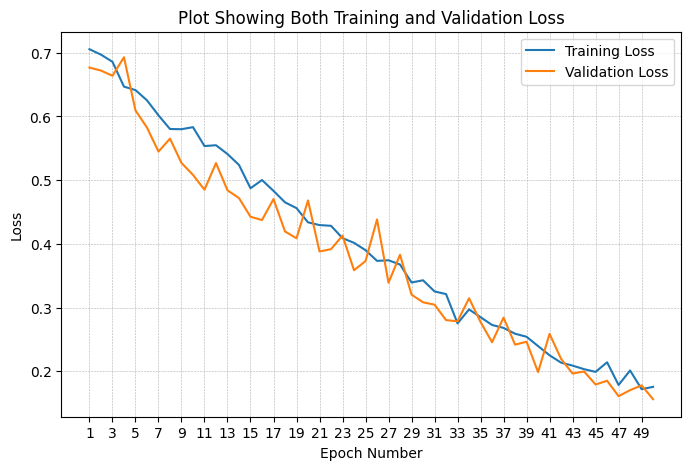

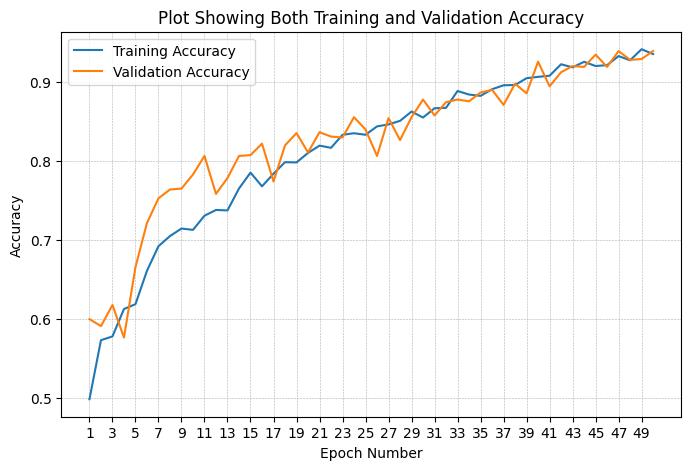

In [74]:
#Plotting Training and Validation loss:
model_performance(figsize=(8,5),model_name=history5,history1='loss',label1='Training Loss',history2='val_loss',
                  label2='Validation Loss',title='Plot Showing Both Training and Validation Loss',
                  xlabel='Epoch Number',ylabel='Loss',epoch=50)

#Plotting Training and Validation Accuracies:
model_performance(figsize=(8,5),model_name=history5,history1='accuracy',label1='Training Accuracy',
                  history2='val_accuracy',label2='Validation Accuracy',
                  title='Plot Showing Both Training and Validation Accuracy',xlabel='Epoch Number',
                  ylabel='Accuracy',epoch=50)

29/29 [==============================] - 22s 767ms/step
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1941
           1       0.96      0.94      0.95      1664

    accuracy                           0.96      3605
   macro avg       0.96      0.96      0.96      3605
weighted avg       0.96      0.96      0.96      3605

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       485
           1       0.94      0.93      0.94       416

    accuracy                           0.94       901
   macro avg       0.94      0.94      0.94       901
weighted avg       0.94      0.94      0.94       901



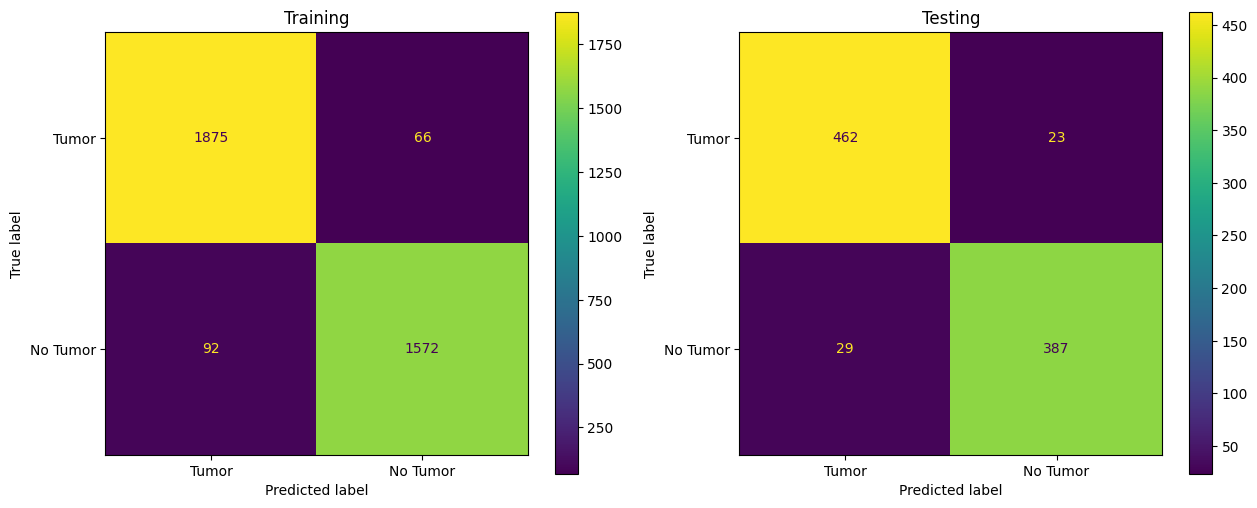

In [72]:
model5 = load_model('Resized_Brain_data/Models/model5.hdf5')

#Training Prediction:
prediction_train5 = building_model(model=model5,test_data=train_generator1)

#Testing Prediction:
prediction_test5 = building_model(model=model5,test_data=test_generator1)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=test_generator1.classes,yTrain=train_generator1.classes,yPrediction_train=prediction_train5,
                                yPrediction_test=prediction_test5,display_labels=class_list)

## Pre-trained VGG-16 Model:

In [75]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [76]:
train_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)

In [77]:
batch_size = 32

train_generator3= train_datagen2.flow_from_directory(train_res_dir, target_size = (200,200),
                                                    batch_size = batch_size, class_mode = 'binary', shuffle = False)

test_generator3 = train_datagen2.flow_from_directory(test_res_dir, target_size = (200,200),
                                                    batch_size = batch_size, class_mode = 'binary', shuffle = False)

Found 3605 images belonging to 2 classes.
Found 901 images belonging to 2 classes.


In [82]:
# define VGG16
base_model = VGG16(include_top=False,input_shape = (200,200,3), weights='imagenet',)

# Freezing the layers because we need just the weights and not the layers.
for layer in base_model.layers:
    layer.trainable = False

# Define the Architecture:
model6 = Sequential()
model6.add(base_model)
model6.add(Flatten())
model6.add(Dense(1024, activation = 'relu'))
model6.add(Dropout(0.5))
model6.add(Dense(2, activation = 'softmax'))

In [83]:
model6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 18432)             0         
                                                                 
 dense_16 (Dense)            (None, 1024)              18875392  
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 2)                 2050      
                                                                 
Total params: 33,592,130
Trainable params: 18,877,442
Non-trainable params: 14,714,688
_________________________________________________________________


In [84]:
# compile the model
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint6 = ModelCheckpoint(os.path.join(model_path, 'model6.hdf5'),save_best_only=True, verbose=1)

# train the network
batch_size = 32
history6 = model6.fit(train_generator3, steps_per_epoch=train_generator3.samples//batch_size,
                    validation_data = test_generator3, validation_steps = test_generator3.samples//batch_size,
                    epochs = 50, callbacks = [checkpoint6, early_stop])

Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 12.3668 - accuracy: 0.7965
Epoch 1: val_loss improved from inf to 0.15955, saving model to Resized_Brain_data/Models\model6.hdf5
112/112 [==============================] - 74s 660ms/step - loss: 12.3668 - accuracy: 0.7965 - val_loss: 0.1595 - val_accuracy: 0.9386
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 0.2656 - accuracy: 0.9062
Epoch 2: val_loss improved from 0.15955 to 0.15010, saving model to Resized_Brain_data/Models\model6.hdf5
112/112 [==============================] - 76s 680ms/step - loss: 0.2656 - accuracy: 0.9062 - val_loss: 0.1501 - val_accuracy: 0.9408
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.1576 - accuracy: 0.9393
Epoch 3: val_loss improved from 0.15010 to 0.09488, saving model to Resized_Brain_data/Models\model6.hdf5
112/112 [==============================] - 76s 676ms/step - loss: 0.1576 - accuracy: 0.9393 - val_loss: 0.0949 - val_accuracy: 0

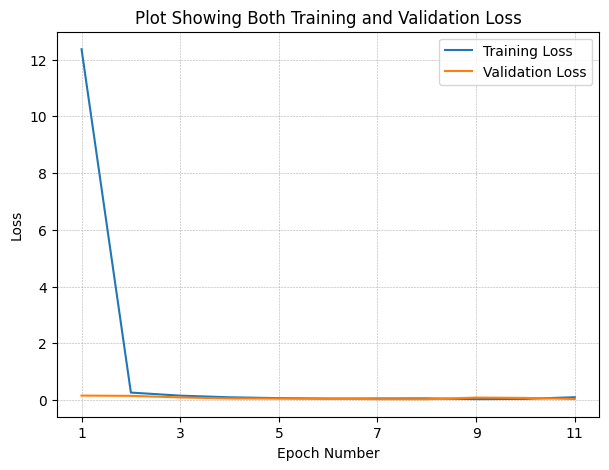

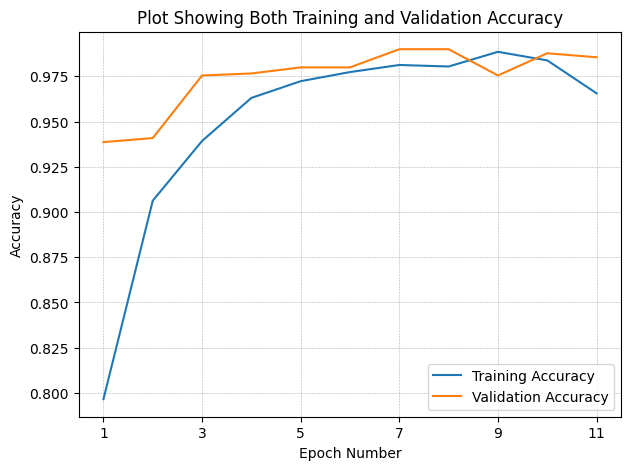

In [85]:
#Plotting Training and Validation loss:
model_performance(figsize=(7,5),model_name=history6,history1='loss',label1='Training Loss',history2='val_loss',
                  label2='Validation Loss',title='Plot Showing Both Training and Validation Loss',
                  xlabel='Epoch Number',ylabel='Loss',epoch=11)

#Plotting Training and Validation Accuracies:
model_performance(figsize=(7,5),model_name=history6,history1='accuracy',label1='Training Accuracy',
                  history2='val_accuracy',label2='Validation Accuracy',
                  title='Plot Showing Both Training and Validation Accuracy',xlabel='Epoch Number',
                  ylabel='Accuracy',epoch=11)

29/29 [==============================] - 14s 498ms/step
Classification Report for Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1941
           1       1.00      1.00      1.00      1664

    accuracy                           1.00      3605
   macro avg       1.00      1.00      1.00      3605
weighted avg       1.00      1.00      1.00      3605

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       485
           1       0.99      0.99      0.99       416

    accuracy                           0.99       901
   macro avg       0.99      0.99      0.99       901
weighted avg       0.99      0.99      0.99       901



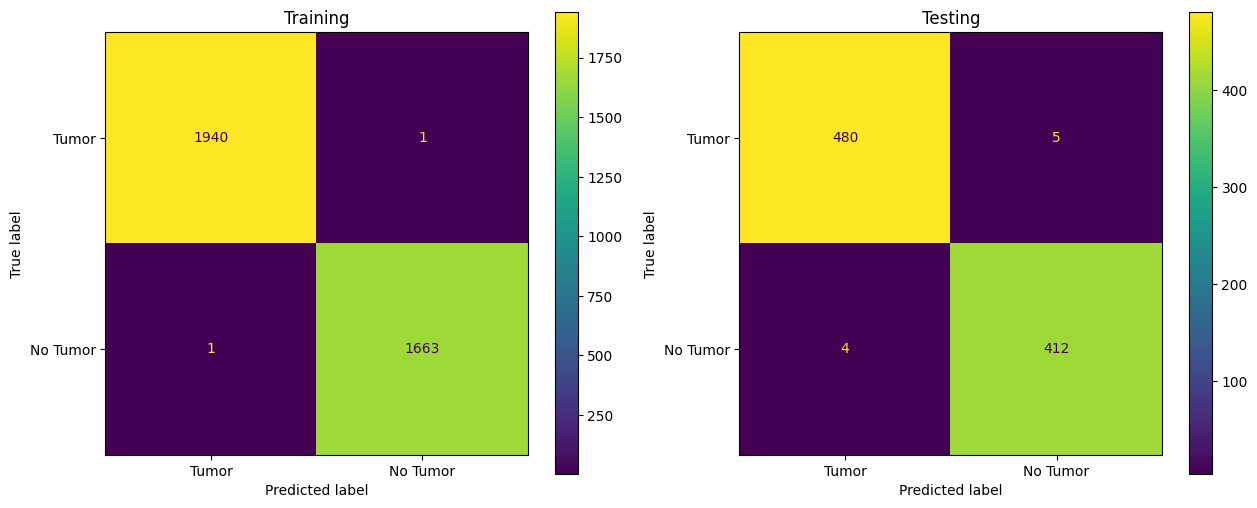

In [87]:
model6 = load_model('Resized_Brain_data/Models/model6.hdf5')

#Training Prediction:
prediction_train6 = building_model(model=model6,test_data=train_generator3)

#Testing Prediction:
prediction_test6 = building_model(model=model6,test_data=test_generator3)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=test_generator3.classes,yTrain=train_generator3.classes,yPrediction_train=prediction_train6,
                                yPrediction_test=prediction_test6,display_labels=class_list)

# Machine Learning Method:

### SVM:

In [159]:
svm_model = SVC()

### Defining Class object for Predictions and Evaluations using Machine Learning :

In [200]:
class ML_Technique:
    def building_model_ML(model,Xtrain_data,X_data,Ytrain_data):
        model.fit(Xtrain_data,Ytrain_data)
        prediction = model.predict(X_data)
        return prediction


    def classification_confusion_matrix_ML(fig,yTest,yTrain,yPrediction_train, yPrediction_test,display_labels):
        print('Classification Report for Training:')
        print(classification_report(yTrain, yPrediction_train))
        print('='*80)
        print('Classification Report for Testing:')
        print(classification_report(yTest, yPrediction_test))
        print('='*80)
        fig, ax = plt.subplots(1,2,figsize=fig)
        ConfusionMatrixDisplay.from_predictions(yTrain,yPrediction_train, display_labels=display_labels,ax=ax[0])
        ConfusionMatrixDisplay.from_predictions(yTest,yPrediction_test, display_labels=display_labels,ax=ax[1])
        ax[0].title.set_text('Training')
        ax[1].title.set_text('Testing')
        plt.show()
        return

### Defining Train and Test data:

In [164]:
# Defining path to train and test images:
res_dir = 'Resized_Brain_data'
train_res_dir = 'Resized_Brain_data/train'
test_res_dir = 'Resized_Brain_data/test'

train_res_label = os.listdir(train_res_dir)
test_res_label = os.listdir(test_res_dir)

In [101]:
# Path to brain tumour and healthy folder:
train_tumor_dir = os.path.join(train_res_dir,os.listdir(train_res_dir)[0])
train_Notumor_dir = os.path.join(train_res_dir,os.listdir(train_res_dir)[1])

In [134]:
train_res_label

['Brain Tumor', 'Healthy']

In [135]:
# Defining class for images:
class_ = {'Brain Tumor':0, 'Healthy':1}

### Defining X_train, y_train, X_test, y_test:

In [136]:
# Creating train image list:
train_list = []
label_list = []
for label in class_:
    path = os.path.join(train_res_dir, label)
    for images in os.listdir(path):
        img_path = os.path.join(path, images)
        img = cv2.imread(img_path)
        train_list.append(img/255)  # Normalizing the image pixels to values between 0 and 1.
        label_list.append(class_[label])

In [139]:
# Creating test image list:
test_list = []
label_list1 = []
for label1 in class_:
    path1 = os.path.join(test_res_dir, label1)
    for images1 in os.listdir(path1):
        img_path1 = os.path.join(path1, images1)
        img1 = cv2.imread(img_path1)
        test_list.append(img1/255) # Normalizing the image pixels to values between 0 and 1.
        label_list1.append(class_[label1])

In [170]:
# Converting to numpy array:
X_train = np.array(train_list)
X_test = np.array(test_list)
y_train = np.array(label_list)
y_test = np.array(label_list1)

In [171]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 1.0
0.0 1.0


- Image data normalized.

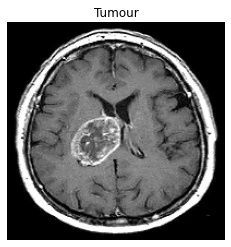

In [190]:
# Visualizing the image:
plt.imshow(X_train[1])
plt.title('Tumour')
plt.axis('off')
plt.show()

In [154]:
pd.Series(y_train).value_counts(normalize=True)

0    0.538419
1    0.461581
dtype: float64

In [153]:
pd.Series(y_test).value_counts()

0    485
1    416
dtype: int64

In [196]:
print(X_train.shape)
print(X_test.shape)

(3605, 200, 200, 3)
(901, 200, 200, 3)


- Scikit-learn works with 2D arrays, hence need to reshape or flatten.

In [197]:
# Reshaping:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [198]:
print(X_train.shape)
print(X_test.shape)

(3605, 120000)
(901, 120000)


### Implementing ML Algorithms for Classification:

### Support Vector Machines (SVC)

In [192]:
svm_model = SVC()

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1941
           1       0.99      0.96      0.97      1664

    accuracy                           0.97      3605
   macro avg       0.98      0.97      0.97      3605
weighted avg       0.98      0.97      0.97      3605

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       485
           1       0.96      0.92      0.94       416

    accuracy                           0.95       901
   macro avg       0.95      0.94      0.95       901
weighted avg       0.95      0.95      0.95       901



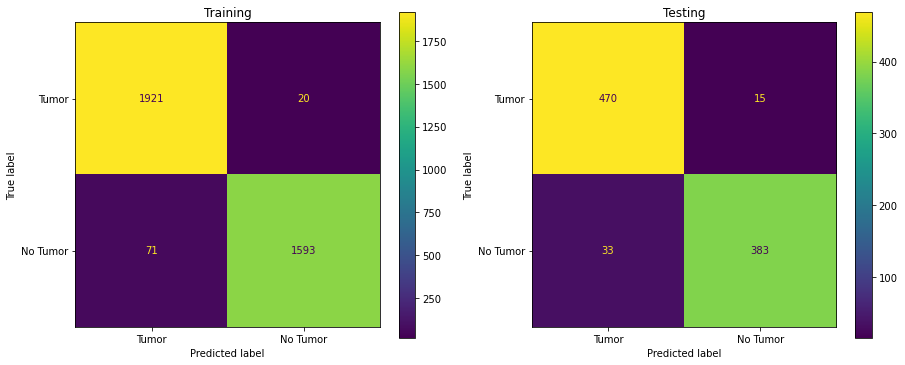

In [163]:
#Training Prediction:
prediction_train = ML_Technique.building_model_ML(model=svm_model,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = ML_Technique.building_model_ML(model=svm_model,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
ML_Technique.classification_confusion_matrix_ML(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,display_labels=class_list)

## Testing Proposed Model:

### On Test dataset:

In [50]:
# Defining path to train and test images:
res_dir = 'Resized_Brain_data'
test_res_dir = 'Resized_Brain_data/test'
test_res_label = os.listdir(test_res_dir)

# Path to brain tumour and healthy folder:
test_tumor_dir = os.path.join(test_res_dir,os.listdir(test_res_dir)[0])
test_no_tumor_dir = os.path.join(test_res_dir,os.listdir(test_res_dir)[1])

1/1 [==============================] - 0s 237ms/step
Prediction: Brain Tumor


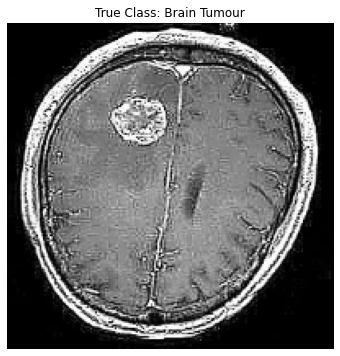

1/1 [==============================] - 0s 134ms/step
Prediction: Healthy


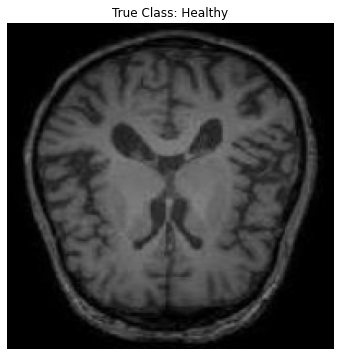

1/1 [==============================] - 0s 124ms/step
Prediction: Brain Tumor


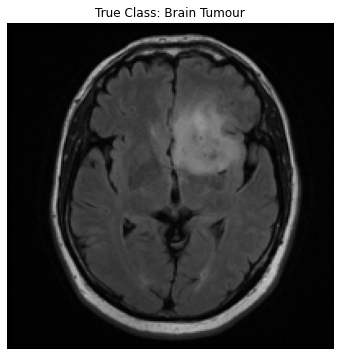

1/1 [==============================] - 0s 127ms/step
Prediction: Healthy


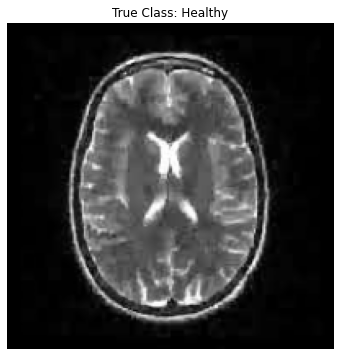

1/1 [==============================] - 0s 126ms/step
Prediction: Brain Tumor


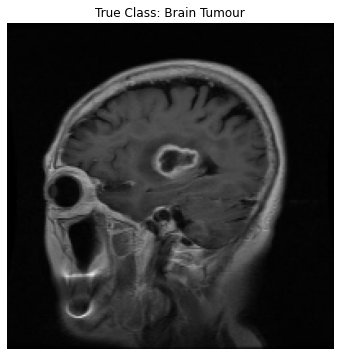

In [57]:
# Loading model from saved directory:
prop_model = load_model('Resized_Brain_data/Models/model6.hdf5')

# Selecting random images for testing:
test_tumor_list = random.sample(os.listdir(test_tumor_dir), 5)
test_no_tumor_list = random.sample(os.listdir(test_no_tumor_dir), 5)
test_tumor_list.extend(test_no_tumor_list)

# Testing model:
samples = random.sample(test_tumor_list, 5)
for sample in samples:
    if sample in os.listdir(test_tumor_dir):
        path_ = os.path.join(test_tumor_dir,sample)
        img = cv2.imread(path_)
        image = np.array(img).reshape(-1, 200, 200, 3)
        label1 = np.argmax(prop_model.predict(image))
        if label1 == 0:
            print('Prediction: Brain Tumor')
        else:
            print('Prediction: Healthy')
        plt.figure(figsize=(6,6))
        plt.imshow(img)
        plt.title('True Class: Brain Tumour')
        plt.axis('off')
        plt.show()
        print('=' * 50)
    elif sample in os.listdir(test_no_tumor_dir):
        path_1 = os.path.join(test_no_tumor_dir,sample)
        img_1 = cv2.imread(path_1)
        image_1 = np.array(img_1).reshape(-1, 200, 200, 3)
        label_1 = np.argmax(prop_model.predict(image_1))
        if label_1 == 1:
            print('Prediction: Healthy')
        else:
            print('Prediction: Brain Tumour')
        plt.figure(figsize=(6,6))
        plt.imshow(img_1)
        plt.title('True Class: Healthy')
        plt.axis('off')
        plt.show()
        print('=' * 50)

- Model performs well predicting the correct class (brain tumour or healthy) of MRI scan.

### Testing Proposed Model on 'Unseen' image MRI dataset.

In [55]:
# Defining path to new image data directory:
res_dir1 = 'Brain_Tumor_Detection'
tumor_dir1 = 'Brain_Tumor_Detection/yes'
no_tumor_dir1 = 'Brain_Tumor_Detection/no'

1/1 [==============================] - 0s 285ms/step
Prediction: Yes


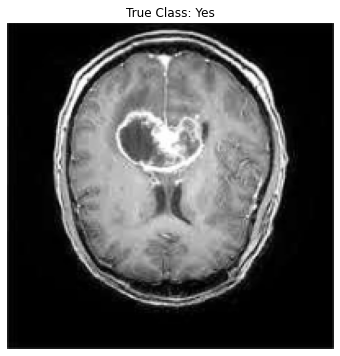

1/1 [==============================] - 0s 119ms/step
Prediction: Yes


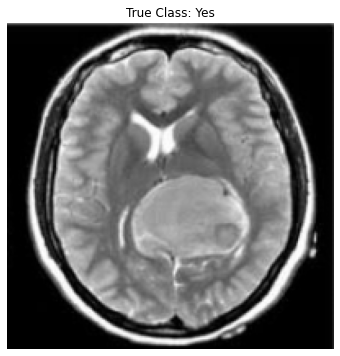

1/1 [==============================] - 0s 133ms/step
Prediction: No


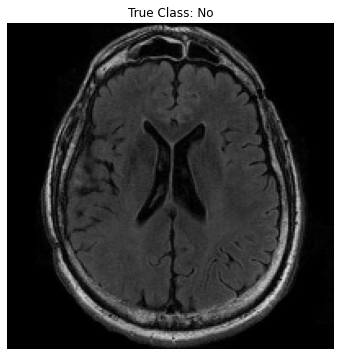

1/1 [==============================] - 0s 128ms/step
Prediction: Yes


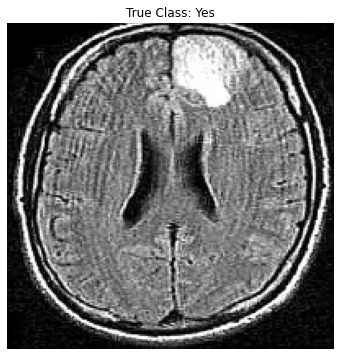

1/1 [==============================] - 0s 127ms/step
Prediction: Yes


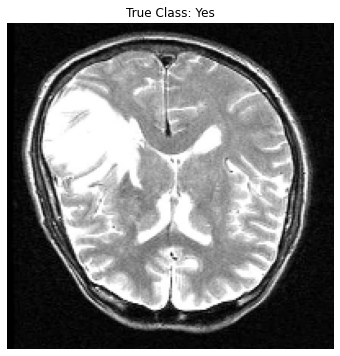

In [58]:
# Loading model from saved directory:
prop_model = load_model('Resized_Brain_data/Models/model6.hdf5')

# Selecting 5 random samples from both classes (yes & no) and appending to a list:
test_tumor_list1 = random.sample(os.listdir(tumor_dir1), 5)
test_no_tumor_list1 = random.sample(os.listdir(no_tumor_dir1), 5)
test_tumor_list1.extend(test_no_tumor_list1)

# Predicting each samples randomly:
samples = random.sample(test_tumor_list1, 5)
for sample in samples:
    if sample in os.listdir(tumor_dir1):
        path_ = os.path.join(tumor_dir1,sample)
        img = cv2.imread(path_)
        img_res = cv2.resize(img, (200,200))  # Image resized to size of model training image
        image = np.array(img_res).reshape(-1, 200, 200, 3) 
        label1 = np.argmax(prop_model.predict(image))
        if label1 == 0:
            print('Prediction: Yes')
        else:
            print('Prediction: No')
        plt.figure(figsize=(6,6))
        plt.imshow(img_res)
        plt.title('True Class: Yes')
        plt.axis('off')
        plt.show()
        print('=' * 50)
    elif sample in os.listdir(no_tumor_dir1):
        path_1 = os.path.join(no_tumor_dir1,sample)
        img_1 = cv2.imread(path_1)
        img_res_1 = cv2.resize(img_1, (200,200))  # Image resized to size of model training image
        image_1 = np.array(img_res_1).reshape(-1, 200, 200, 3)
        label_1 = np.argmax(prop_model.predict(image_1))
        if label_1 == 1:
            print('Prediction: No')
        else:
            print('Prediction: Yes')
        plt.figure(figsize=(6,6))
        plt.imshow(img_res_1)
        plt.title('True Class: No')
        plt.axis('off')
        plt.show()
        print('=' * 50)

- Proposed model correctly classifies the MRI scans to determine the presence or absence of tumour.